# **SHETH L.U.J. & SIR M.V. COLLEGE**
**Shreeraj Desai | T075**
### **Practical No. 7B**
**Aim**: Logistic Regression and Decision Tree

*   Build a logistic regression model to predict a binary outcome.
*   Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
*   Construct a decision tree model and interpret the decision rules for classification.







# **Decision Tree - Credit Scoring**

**Analysis of clients.csv**

This notebook applies Decision Tree Classification to predict `bad_client_target`.


# Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
print("Libraries imported ")

df = pd.read_csv("Datasets/clients2.csv")
print("dataframe of dataset created")

Libraries imported 
dataframe of dataset created


In [2]:
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0.0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1.0,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0.0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,NaN,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0.0,2,26000,Married,0,1,0


In [3]:
# Selecting relevant columns for classification
# Dropping 'month' as it might be temporal, keeping features likely to impact credit worthiness
df = df[['credit_amount', 'credit_term', 'age', 'sex', 'education', 'product_type', 'having_children_flg', 'region', 'income', 'family_status', 'phone_operator', 'is_client', 'bad_client_target']]

# Cleaning DataSet

In [4]:
#finding NULL instances
df.isnull().sum()

credit_amount           0
credit_term             0
age                     0
sex                     0
education               0
product_type            0
having_children_flg    20
region                  0
income                  0
family_status           0
phone_operator          0
is_client               0
bad_client_target       0
dtype: int64

In [5]:
# Imputing missing values
# For numerical columns like credit_amount, we use mean
df['credit_amount'] = df['credit_amount'].fillna(df['credit_amount'].mean())

# For categorical/binary like having_children_flg, we fill with 0 or mode
df['having_children_flg'] = df['having_children_flg'].fillna(0)

print("Nulls after cleaning:")
print(df.isnull().sum())

Nulls after cleaning:
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64


# Changing category column to numerical column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all object/string columns
categorical_cols = ['sex', 'education', 'product_type', 'family_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,7000,12,39,1,5,3,0.0,2,21000,0,0,0,0
1,19000,6,20,1,5,13,1.0,2,17000,0,3,1,0
2,29000,12,23,0,5,13,0.0,2,31000,0,2,0,0
3,10000,12,30,1,5,3,0.0,2,31000,2,3,1,0
4,14500,12,25,0,0,3,0.0,2,26000,1,0,1,0


In [7]:
# X- Features  y- Label
X = df.drop('bad_client_target', axis=1)
y = df['bad_client_target']

# Doing train_test_split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the model

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini')
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Checking accuracy of testing dataset

In [10]:
from sklearn.metrics import accuracy_score
predictions_test = clf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions_test)*100)

Accuracy :  81.23791102514507


# Checking accuracy of training dataset

In [11]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train, predictions_train)

1.0

#### If the training accuracy is 1.0 (or very high) and test accuracy is lower, the model is likely `overfitted`.

# Visualizing our final decision tree

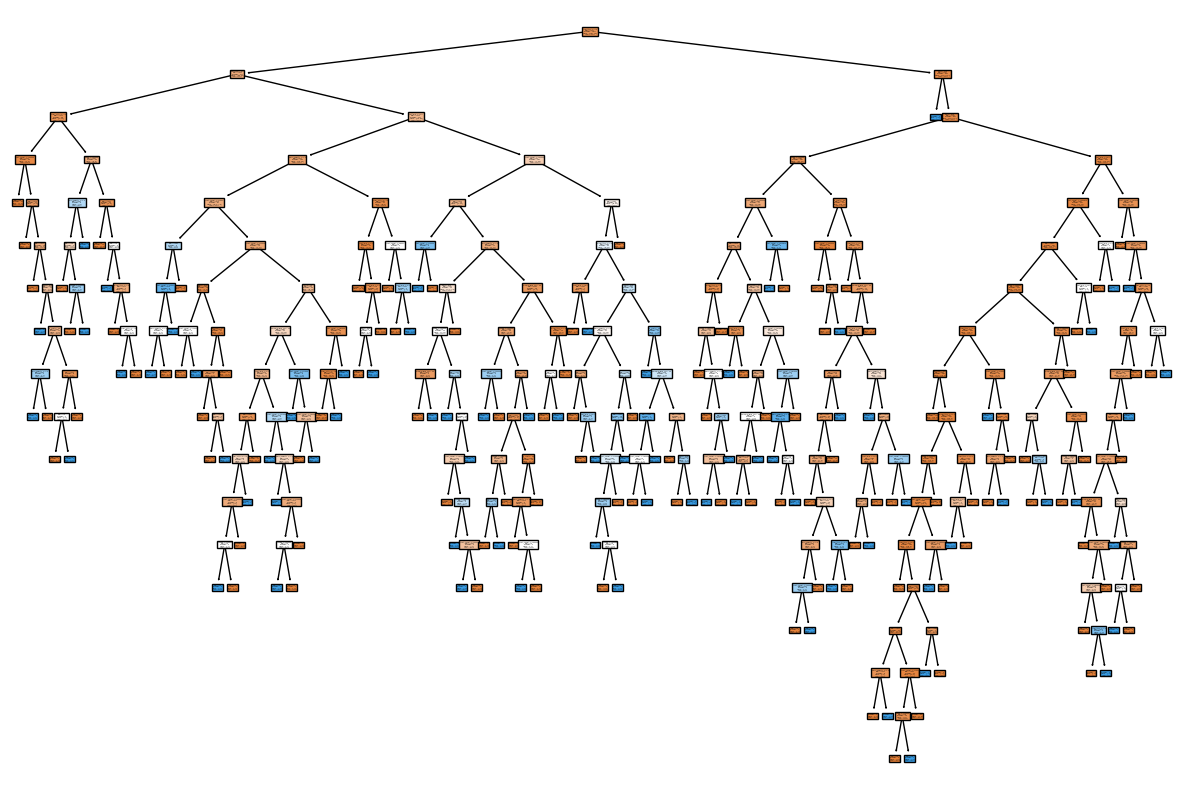

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Good', 'Bad'])
plt.show()

# Evaluating our test dataset

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       470
           1       0.18      0.30      0.22        47

    accuracy                           0.81       517
   macro avg       0.55      0.58      0.56       517
weighted avg       0.86      0.81      0.83       517

[[406  64]
 [ 33  14]]


# Finding false positive rate and true positive rate

In [14]:
from sklearn.metrics import roc_curve, auc
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_score_dt = auc(fpr_dt, tpr_dt)
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)

FPR : [0.         0.13617021 1.        ]
TPR : [0.         0.29787234 1.        ]
Threshold : [inf  1.  0.]


# Plotting *ROC* curve for our Decision Tree

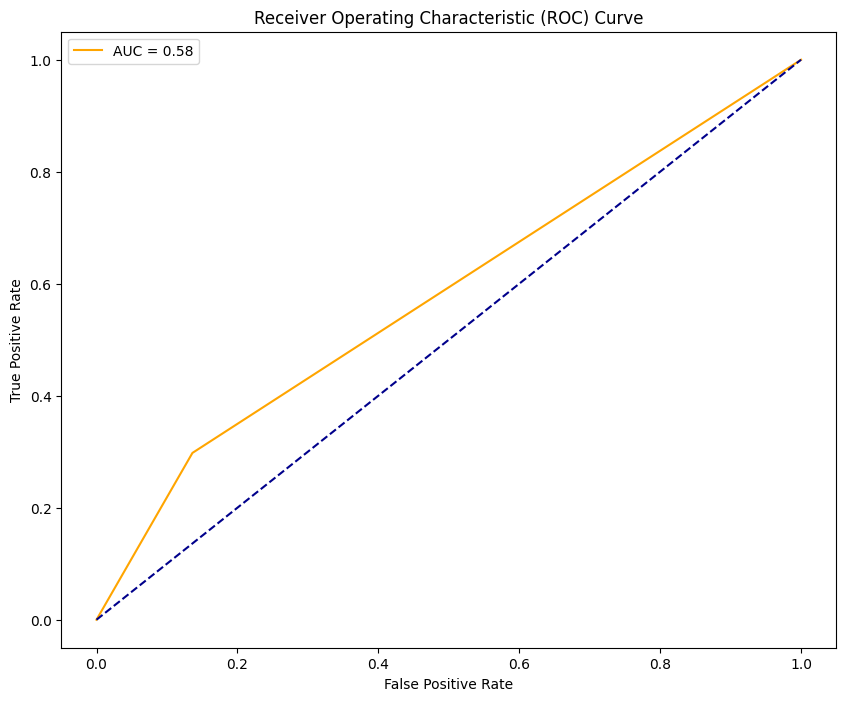

In [15]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt, tpr_dt)

# Pruning of our decision tree
Using Cost Complexity Pruning to handle overfitting.

In [16]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

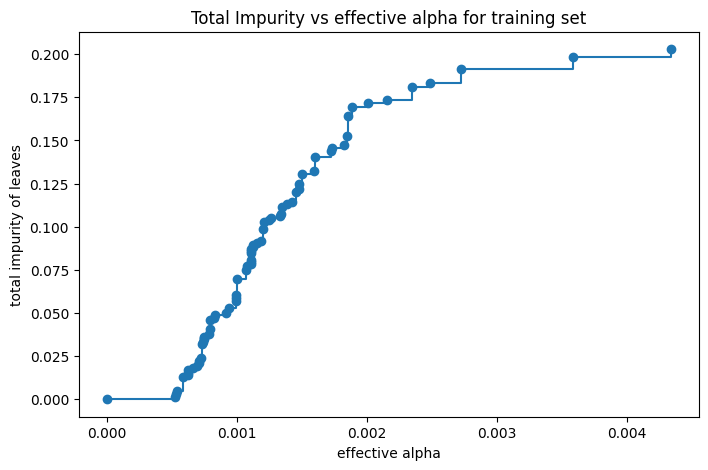

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.013664315487361772


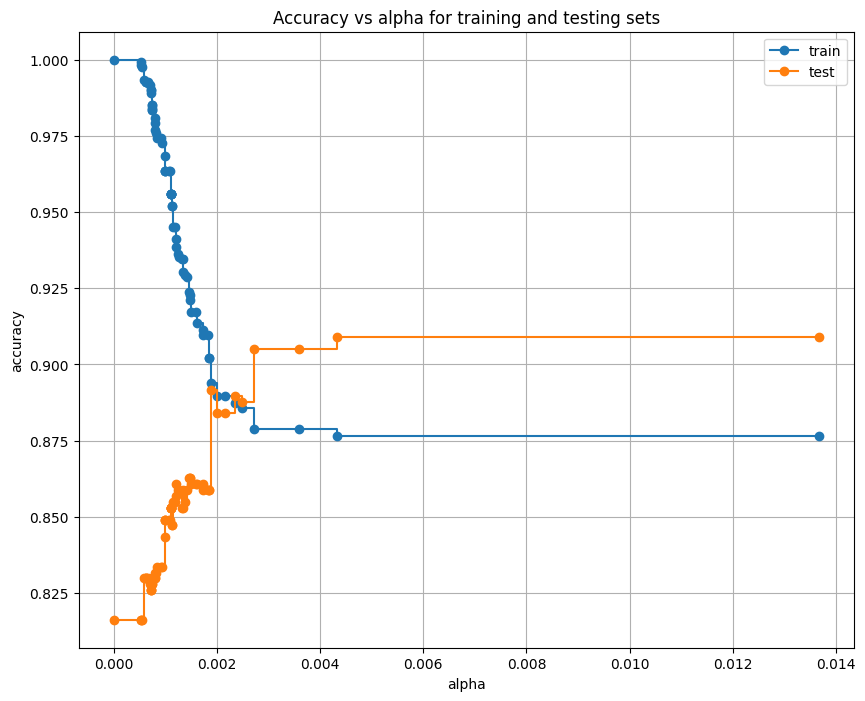

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning
Selecting an optimal alpha based on the plot above.

In [36]:
# We choose an alpha that maximizes test accuracy without being too simple.
# For this dataset (mock data), the graph might vary, so we select the best performer from test_scores
index_best_model = np.argmax(test_scores)
best_alpha = ccp_alphas[index_best_model]-0.002  #Slightly increase to avoid overfitting
print(f"Best Alpha: {best_alpha}")

clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

Best Alpha: 0.002333900194893353


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Accuracy of test dataset

In [37]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.8839458413926499

### Accuracy of training dataset

In [38]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train, pred_1)

0.8897180762852405

# Visualizing after pruning

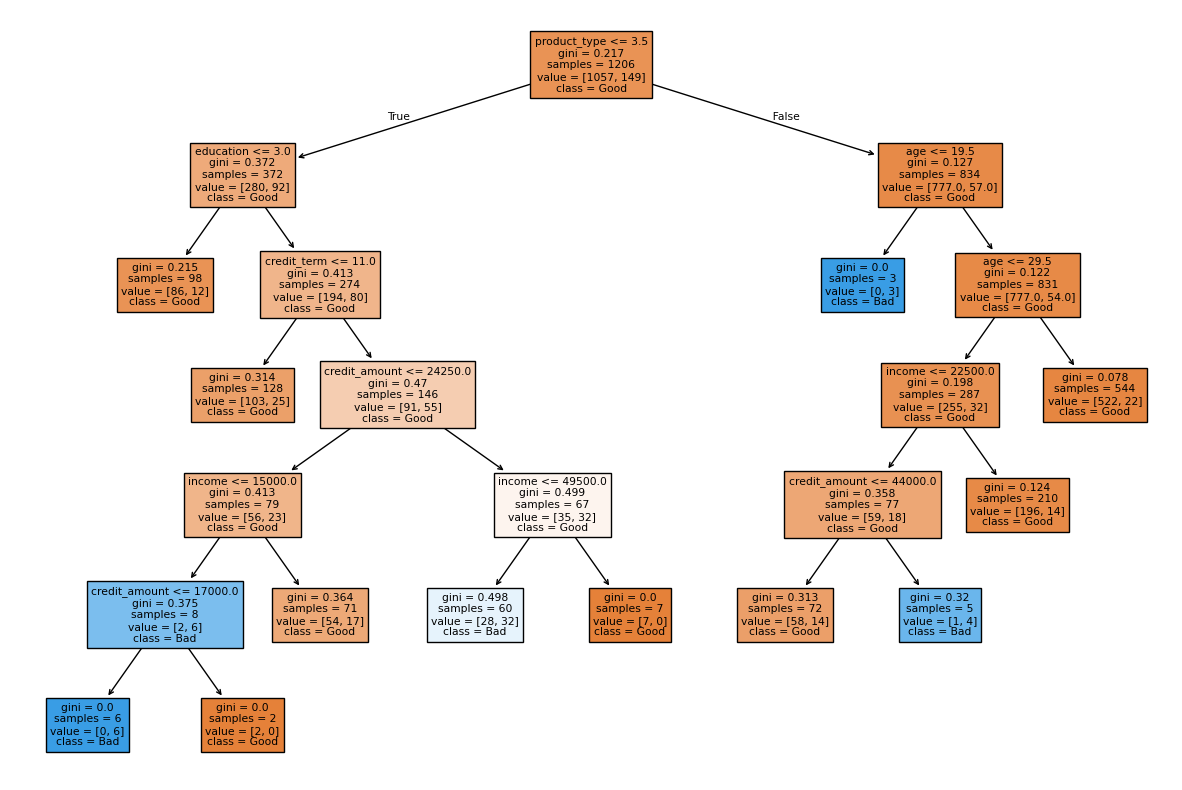

In [39]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Good', 'Bad'])
plt.show()